## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [4]:
directory = '/home/USER/notebooks/pcaps/nmap_tcp_full_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.102643
Name: time, dtype: float64

In [6]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    0.102643
1    0.092787
2    0.107084
3    0.103172
4    0.068402
5    0.073113
6    0.089701
7    0.089056
8    0.068830
9    0.071376
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    0.086616
dtype: float64

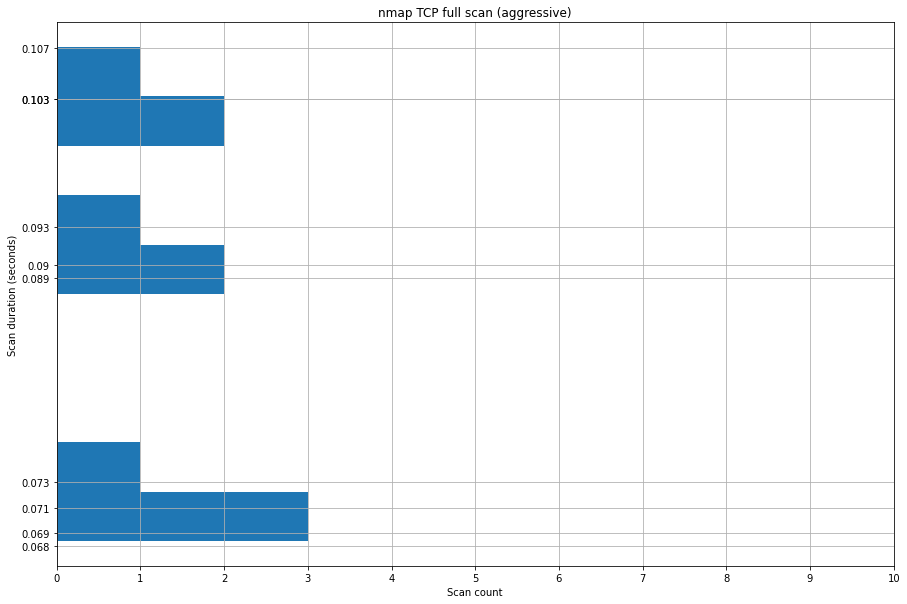

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

0
count  10.000000
mean    0.086616
std     0.015152
min     0.068402
25%     0.071810
50%     0.089378
75%     0.100179
max     0.107084

## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1732.3284149169922



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 45696 25
2 53900 110
3 34584 3306
4 33072 22
5 49112 53
6 53358 111
7 50034 445
8 54176 993
9 52524 139
10 46092 256
11 33278 135
12 36496 554
13 57896 143
14 53314 443
15 51514 995
16 42132 21
17 39730 1720
18 59242 199
19 42224 1025
20 55996 113
21 38096 3389
22 46476 5900
23 43474 8888
24 50610 8080
25 49154 80
26 40136 1723
27 49848 23
28 54330 587
29 39212 1055
30 53798 3659
31 35388 19350
32 51570 3390
33 41892 5800
34 58824 2191
35 49952 1301
36 35546 1130
37 41438 4446
38 53256 7000
39 38686 999
40 54988 617
41 33950 88
42 53220 30718
43 45746 1028
44 57660 20005
45 48158 19780
46 42900 1090
47 52740 3998
48 37644 4900
49 39164 5815
50 46236 3880
51 40338 3031
52 54416 49160
53 52410 32781
54 36944 1187
55 45062 1066
56 33850 2009
57 38998 524
58 51286 18101
59 53458 3030
60 51296 2099
61 49960 32774
62 43550 3300
63 52646 6129
64 50486 4279
65 50934 749
66 47976 1045
67 55634 6003
68 44224 1022
69 40048 1947
70 50304 32768
71 45702 9100
72 58494 1352
73 53808 1009
74 57178 2

610 33048 2260
611 34154 2035
612 34742 64623
613 49980 1501
614 56474 32773
615 49474 1011
616 51388 8652
617 57074 6543
618 58286 8222
619 38834 3001
620 56212 1061
621 49902 15003
622 33976 4662
623 37886 3493
624 44068 8200
625 59372 2607
626 38342 9081
627 36290 1071
628 42198 2065
629 53554 6668
630 56534 1096
631 44802 2301
632 42892 7911
633 36206 9502
634 34310 1641
635 37440 1064
636 50780 2967
637 45672 50636
638 41778 49167
639 54478 8500
640 39972 9999
641 57778 32785
642 38390 10617
643 51510 31337
644 54124 42
645 33284 6580
646 45270 1718
647 43428 2394
648 55826 1099
649 33562 625
650 42742 8193
651 36816 57294
652 40394 1043
653 36678 2196
654 54002 1131
655 37872 5544
656 52058 1213
657 55364 10002
658 37020 16018
659 41300 6001
660 37620 3905
661 49542 8085
662 54412 49154
663 43250 8087
664 50378 7106
665 38118 2005
666 53634 7025
667 54690 7402
668 57496 10629
669 44944 2702
670 51298 8400
671 35594 26214
672 55412 50002
673 58310 8180
674 59304 1093
675 43156 491

622 44118 12000
623 47460 28201
624 59880 5910
625 33396 1580
626 56960 5801
627 32908 8045
628 35970 10003
629 51298 32777
630 40642 1090
631 50700 912
632 43216 2401
633 47350 5500
634 45126 8291
635 42818 49159
636 47394 3369
637 51024 32778
638 50750 3324
639 44834 6002
640 43966 5440
641 43232 8084
642 60486 9900
643 53526 1141
644 56456 3809
645 47476 10024
646 37938 3889
647 55318 10215
648 57690 1117
649 41330 843
650 40296 5120
651 39804 119
652 45000 38292
653 55566 2909
654 47656 48080
655 33366 1044
656 50268 545
657 41956 49157
658 58662 9898
659 50396 9050
660 54256 1065
661 48932 65389
662 37336 64623
663 46986 3325
664 49360 2701
665 58354 1164
666 59002 1417
667 53058 1081
668 42980 30718
669 48842 15660
670 52320 2034
671 40606 55056
672 33270 543
673 48024 34571
674 35836 19842
675 44650 1900
676 39902 1009
677 38780 1056
678 34800 1122
679 55542 4443
680 34100 31337
681 50334 1309
682 47558 1198
683 35628 3826
684 50344 6839
685 33540 50500
686 40772 6
687 36856 235

232 53308 5666
233 38326 6692
234 48744 52822
235 51928 8087
236 39710 1001
237 59688 1259
238 50450 2043
239 58366 5800
240 58704 3871
241 60890 8001
242 42460 2170
243 48492 1094
244 45314 7496
245 59710 9943
246 45754 5902
247 38880 179
248 38940 14442
249 43158 1658
250 39936 5862
251 57610 55055
252 40032 6002
253 45976 44501
254 44112 13
255 52542 2717
256 37118 1141
257 58868 4899
258 45514 700
259 48444 3546
260 55552 6901
261 40992 8194
262 40132 5004
263 50154 2111
264 38096 3918
265 55040 2068
266 52302 8010
267 55826 2103
268 57688 10001
269 60576 61532
270 46696 3323
271 55586 37
272 59086 6565
273 42936 8400
274 39648 5000
275 40798 20828
276 53104 57797
277 42400 8193
278 46410 902
279 52852 3920
280 43524 8873
281 44566 1972
282 46006 544
283 57358 8292
284 35708 4446
285 47338 10626
286 40356 3527
287 53150 3269
288 41384 9575
289 34192 6007
290 37774 3580
291 58372 10215
292 49068 636
293 46428 6156
294 47192 5911
295 59188 4224
296 47920 7938
297 36550 15000
298 4800

276 33502 3128
277 56118 3013
278 56692 4001
279 35394 9071
280 49470 11111
281 38252 49152
282 42712 9876
283 58448 2998
284 35146 9110
285 53170 1718
286 40468 1503
287 59634 16012
288 41894 6789
289 33986 35500
290 50228 1007
291 52554 543
292 53564 4900
293 58728 49165
294 58692 5544
295 49070 5679
296 45070 70
297 48792 9415
298 35260 65389
299 46586 5901
300 33644 417
301 40792 1052
302 41890 1152
303 55208 8088
304 37088 109
305 35520 8873
306 41420 3351
307 49802 2869
308 51558 8021
309 46810 1069
310 43546 6100
311 40938 5120
312 50588 6112
313 49034 9503
314 45472 4005
315 37068 6025
316 40994 1805
317 37044 3211
318 36684 24444
319 48808 2009
320 39476 7201
321 37312 9010
322 38162 2602
323 53628 1068
324 39362 5903
325 59482 8254
326 45612 54045
327 35304 2525
328 49562 901
329 57880 1974
330 47870 2135
331 55536 15000
332 35158 5962
333 49046 6006
334 32794 4
335 46498 9090
336 36634 1271
337 56578 9000
338 56846 1875
339 48250 3851
340 55552 5730
341 43624 481
342 43754 1

442 35668 30000
443 53580 5952
444 49976 25734
445 60808 9001
446 49354 88
447 53508 49156
448 33800 5915
449 41152 49176
450 41760 7911
451 47012 6002
452 44724 3827
453 57980 1556
454 38212 5087
455 50182 366
456 54420 50003
457 58552 6009
458 39252 65389
459 34880 50000
460 49620 10004
461 48698 4003
462 44498 6025
463 37698 16992
464 37070 3920
465 43596 8652
466 53780 427
467 46624 16016
468 43268 56737
469 36626 6059
470 35284 5631
471 41436 1272
472 43264 2105
473 55844 26214
474 52166 2251
475 46028 9200
476 52546 2366
477 48606 19283
478 41680 5200
479 41086 2967
480 50114 880
481 42742 416
482 39900 722
483 41438 9418
484 37828 6789
485 47562 16000
486 39964 2601
487 33144 1805
488 39428 3690
489 46490 6
490 52392 1192
491 36786 2800
492 37116 2393
493 58168 89
494 58662 44442
495 40230 5901
496 41446 19101
497 40352 49999
498 47686 3007
499 57964 3766
500 42324 548
501 52708 7106
502 40558 7007
503 36734 19315
504 53032 4446
505 53854 4449
506 43906 1164
507 51610 5555
508 3

108 41838 6669
109 41090 5414
110 42946 5910
111 59188 16080
112 56302 3268
113 36112 6346
114 57122 9
115 43594 8873
116 53468 41511
117 37990 1027
118 58294 48080
119 60196 3690
120 43868 898
121 36882 5952
122 56340 1090
123 51842 9878
124 48232 3784
125 48580 1717
126 36840 3517
127 53810 1049
128 57262 1688
129 42066 1070
130 44560 843
131 37976 2040
132 42122 306
133 35546 10025
134 40476 1719
135 60756 52869
136 44072 416
137 38152 5987
138 50562 4
139 55078 1060
140 38406 1801
141 53004 1102
142 39848 1287
143 43000 81
144 48786 1152
145 55822 8443
146 37812 11111
147 50730 19842
148 57146 1031
149 42276 1864
150 39318 1947
151 41858 2041
152 33530 515
153 54930 2399
154 56674 2107
155 44848 1310
156 41340 1119
157 53724 8180
158 52650 7025
159 57052 65000
160 40036 5862
161 44646 1972
162 51288 6123
163 56434 8402
164 47360 7921
165 39538 4001
166 48614 1094
167 39856 2160
168 50016 3052
169 36582 1122
170 33804 1600
171 58960 481
172 38162 465
173 37944 5033
174 40064 7007
17

775 42680 5555
776 43054 8400
777 58988 6003
778 55804 44442
779 50664 9050
780 53470 2046
781 53466 5962
782 56452 3283
783 60054 8008
784 37202 4004
785 58798 2013
786 33320 146
787 36884 15002
788 35738 1782
789 60372 49155
790 40598 2038
791 53008 9001
792 46748 5054
793 37728 9666
794 48482 9593
795 33078 5405
796 35976 85
797 41392 2161
798 41504 2394
799 56540 5060
800 41582 10009
801 49870 50002
802 50590 1114
803 51998 25735
804 34510 7937
805 41202 1199
806 45320 32785
807 55164 2068
808 32968 8800
809 46512 6156
810 47850 5633
811 56260 2608
812 38254 32775
813 39830 1001
814 58912 8500
815 37260 1201
816 59720 5030
817 60422 106
818 42540 2170
819 59658 2910
820 35330 1092
821 47482 2121
822 44418 280
823 51902 555
824 44950 27355
825 50764 5730
826 46286 49167
827 45524 2718
828 47024 1328
829 48636 1038
830 55096 3370
831 40632 777
832 36642 15000
833 48212 10012
834 48676 9080
835 60462 1035
836 42058 1718
837 51936 32783
838 45492 1417
839 60968 27352
840 35106 50001
84

441 59912 8010
442 33068 3659
443 43054 2021
444 49462 6692
445 41534 9001
446 34918 54328
447 60806 49156
448 37634 8500
449 50240 2717
450 33370 1154
451 41906 16992
452 60396 2034
453 41050 49152
454 53112 8290
455 54012 264
456 57854 1494
457 47256 7025
458 34706 9502
459 56676 10025
460 34468 1533
461 42976 4446
462 37786 15003
463 39936 55600
464 35890 720
465 58646 5850
466 37556 2035
467 59778 5822
468 36576 2106
469 39558 2323
470 49160 49154
471 60382 4449
472 41802 7938
473 50040 5989
474 55186 722
475 35898 1071
476 57220 1056
477 53010 8193
478 54778 1117
479 35264 714
480 56190 6646
481 49156 1217
482 45702 5050
483 58632 1719
484 50434 14238
485 44914 7800
486 45168 3031
487 34754 7004
488 49780 3580
489 43824 5679
490 43370 6543
491 33670 1163
492 40384 9000
493 35952 1984
494 42388 1782
495 42208 2394
496 41480 63331
497 50086 3052
498 53900 2968
499 49556 1049
500 54752 9415
501 38610 563
502 59610 2047
503 50592 33354
504 57072 8087
505 53310 808
506 49226 55555
507 

108 59560 3300
109 46516 44443
110 44034 1761
111 43122 10082
112 47806 6669
113 40926 340
114 50330 5001
115 42866 33899
116 58974 3827
117 59204 1024
118 52168 2170
119 49950 8181
120 49952 2038
121 34404 3007
122 59514 6101
123 42742 8300
124 52482 1169
125 55314 49156
126 44080 16001
127 52850 808
128 43122 5961
129 35920 3998
130 40080 9290
131 47660 6667
132 44834 1434
133 34758 16018
134 39562 44442
135 56286 6788
136 53270 1054
137 58234 6969
138 44268 7435
139 33956 1163
140 41824 1059
141 45300 99
142 55728 20222
143 53916 9091
144 32940 1111
145 46710 4224
146 44324 987
147 48506 2394
148 51974 44176
149 41430 5061
150 54326 1199
151 53764 1236
152 35910 2522
153 50164 6129
154 32858 2065
155 36508 32772
156 43376 6005
157 59038 2099
158 44144 26214
159 55852 10566
160 49280 1092
161 51390 8087
162 49948 800
163 53910 3
164 46578 6025
165 37984 464
166 44376 1166
167 51800 481
168 52376 1971
169 41510 32769
170 50154 9071
171 56654 3000
172 50700 49152
173 50612 5060
174 426

681 33406 2030
682 51684 3766
683 55072 9040
684 45094 54045
685 36242 3301
686 33316 714
687 43472 3211
688 45800 3814
689 33892 38292
690 60630 13782
691 36330 7002
692 60272 2608
693 43666 1216
694 42738 62078
695 53710 10616
696 39338 2500
697 58644 500
698 46296 5952
699 34066 366
700 53758 8600
701 45982 1131
702 59458 1277
703 55258 1145
704 34556 2005
705 33468 8081
706 52846 9010
707 45706 691
708 48674 4129
709 46954 8088
710 37760 902
711 46426 3013
712 49662 4444
713 57478 1147
714 35988 1117
715 55028 4848
716 60666 1900
717 53004 1322
718 54240 9002
719 52304 5298
720 59380 8443
721 47414 1045
722 57742 1187
723 39574 3703
724 50462 144
725 38616 5510
726 51330 119
727 51468 2008
728 49550 7800
729 43968 19350
730 36272 3367
731 32946 5280
732 55606 5822
733 47586 13
734 39126 5862
735 58160 1028
736 43500 5925
737 38378 465
738 35298 8002
739 46306 32782
740 46392 32771
741 41796 1009
742 57036 563
743 53658 8000
744 43146 2103
745 46624 2007
746 48374 28201
747 40356 55

274 51620 524
275 35684 1104
276 41358 646
277 35498 50001
278 33642 911
279 47468 1100
280 52726 2366
281 32860 9594
282 48180 7000
283 54394 3261
284 60716 427
285 46696 3905
286 33930 5226
287 34154 3351
288 52282 255
289 42390 2179
290 48990 32770
291 55472 1047
292 45300 2190
293 55270 20828
294 39856 4550
295 35598 666
296 32978 3030
297 49638 8292
298 39716 1040
299 59506 32779
300 32794 27715
301 56178 2043
302 46910 720
303 53828 1087
304 60690 8042
305 57016 10778
306 40344 88
307 48132 49165
308 38392 3300
309 45712 56737
310 37922 3801
311 59866 49176
312 59424 808
313 46184 407
314 49182 2170
315 36870 1974
316 43670 17
317 44722 1244
318 49956 6001
319 41316 146
320 42592 4321
321 35596 49158
322 54826 8086
323 60858 16016
324 48354 9502
325 50070 7
326 54590 50002
327 54346 5633
328 56366 20005
329 49702 26
330 50486 5679
331 59232 9091
332 39196 43
333 50992 898
334 56090 1141
335 51782 6100
336 46400 1666
337 43816 9575
338 47598 50003
339 45320 3017
340 42180 1034
341

941 60810 4449
942 35726 1164
943 42794 5054
944 57602 49160
945 35998 1163
946 47794 8994
947 58772 2047
948 49506 5906
949 45340 15004
950 55444 2196
951 37942 1113
952 38308 9595
953 36306 1137
954 49948 8402
955 39678 2022
956 33034 2998
957 51800 7800
958 58918 12000
959 41078 1117
960 56462 6692
961 41980 1998
962 44384 9618
963 60782 30951
964 52698 35500
965 46562 5101
966 54170 5033
967 49672 4998
968 47216 416
969 35676 8007
970 51382 14441
971 46384 1494
972 38074 1031
973 60992 1089
974 33134 2500
975 49010 749
976 59022 2702
977 33932 8194
978 49054 7004
979 46230 1111
980 55140 8031
981 39400 6669
982 56390 9110
983 52872 27355
984 40122 5200
985 35684 10010
986 54626 1086
987 41792 2718
988 39252 425
989 50406 34572
990 58776 8021
991 51848 49175
992 34718 616
993 54184 1154
994 44366 9200
995 40526 3827
996 48646 2009
997 44628 10566
998 41650 2492
999 54552 18101
1000 48682 6389
1 42428 135
2 49056 25
3 60526 554
4 51872 8080
5 46222 139
6 48388 21
7 37800 443
8 57848 

585 45236 700
586 45130 2105
587 37850 3918
588 55882 5963
589 39716 50000
590 50518 3945
591 46846 12174
592 52176 3011
593 54692 5200
594 59866 3221
595 60874 55555
596 37382 1027
597 49412 9485
598 51864 9968
599 48346 4443
600 44638 1443
601 44250 5003
602 41184 62078
603 53580 1113
604 45970 27715
605 49834 1089
606 49158 222
607 48754 2179
608 43490 19801
609 48248 18101
610 57716 33354
611 60060 9877
612 59222 5998
613 35760 3
614 45110 119
615 60324 2869
616 60812 8652
617 56138 1138
618 46318 58080
619 48108 3546
620 50166 9050
621 46080 3077
622 50824 6123
623 58490 79
624 39418 3404
625 39492 903
626 54348 49157
627 41212 9101
628 38690 7002
629 38428 83
630 56192 16016
631 34578 50001
632 56756 5222
633 53406 24800
634 38434 1080
635 37600 1461
636 38096 1034
637 52838 6006
638 39376 32779
639 45154 264
640 56570 9
641 34844 5822
642 60116 4125
643 55612 6566
644 55882 2608
645 49594 5100
646 52024 49999
647 55680 458
648 55876 714
649 48962 2004
650 58168 8084
651 52098 59

In [16]:
orders_port

scannr  sport  dport
0          1  45696     25
1          2  53900    110
2          3  34584   3306
3          4  33072     22
4          5  49112     53
...      ...    ...    ...
9995     996  39286   5000
9996     997  37424   3580
9997     998  38100   3007
9998     999  59202   6668
9999    1000  59336   1494

[10000 rows x 3 columns]

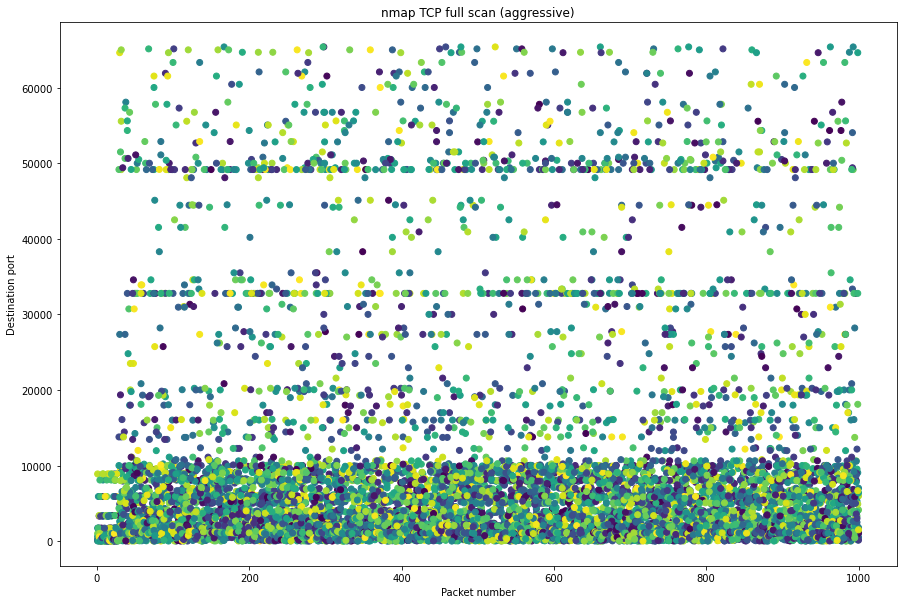

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

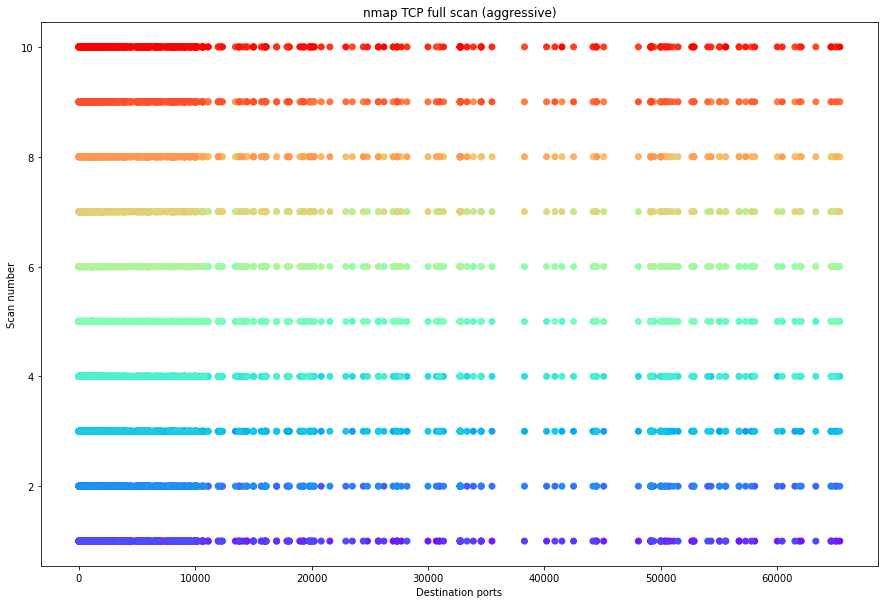

In [20]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [21]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

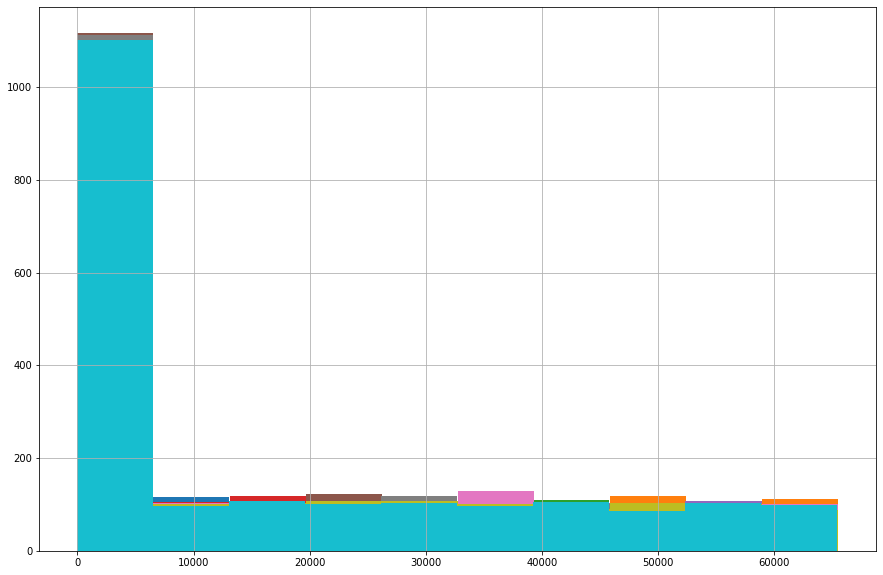

In [22]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

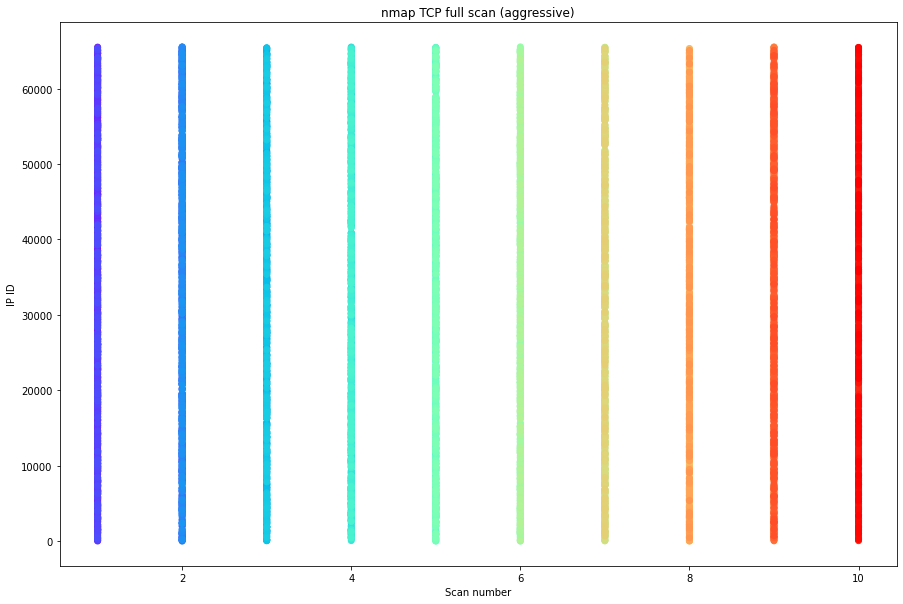

In [23]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

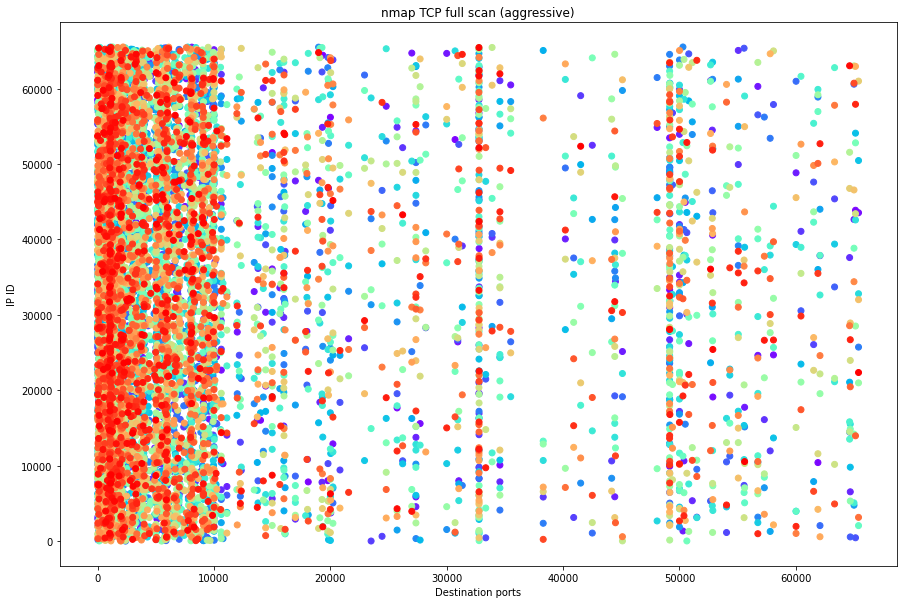

In [24]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

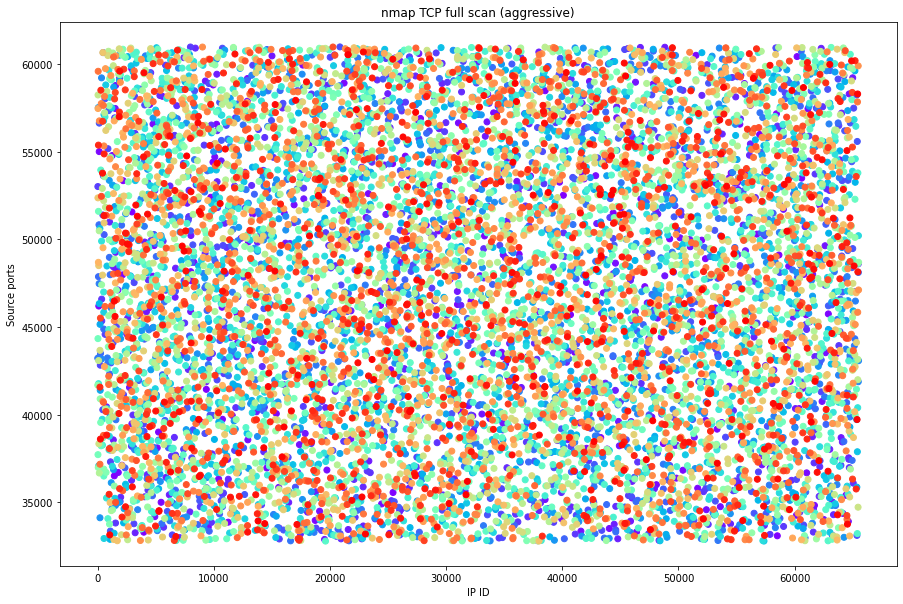

In [25]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 652838235
Sequence number: 222310893
Sequence number: 468941645
Sequence number: 2949792840
Sequence number: 3652768055
Sequence number: 3931376340
Sequence number: 2937751386
Sequence number: 2849901684
Sequence number: 3799672886
Sequence number: 3487766013
Sequence number: 861222455
Sequence number: 1217233354
Sequence number: 2679167259
Sequence number: 443670228
Sequence number: 3153406537
Sequence number: 686973955
Sequence number: 4088666493
Sequence number: 720467775
Sequence number: 3325290378
Sequence number: 1963695832
Sequence number: 2405593110
Sequence number: 1717289662
Sequence number: 3468836559
Sequence number: 1107347090
Sequence number: 462180960
Sequence number: 1818286609
Sequence number: 3137458637
Sequence number: 923604237
Sequence number: 893959628
Sequence number: 4127697943
Sequence number: 3278730644
Sequence number: 1760527407
Sequence number: 1230581079
Sequence number: 1182817023
Sequence number: 3208405977
Sequence number: 4283374707
Se

Sequence number: 456981504
Sequence number: 2804970730
Sequence number: 1196169313
Sequence number: 3113836871
Sequence number: 1340177716
Sequence number: 1410013782
Sequence number: 2285551326
Sequence number: 1340045993
Sequence number: 2223556409
Sequence number: 2750695729
Sequence number: 2387814384
Sequence number: 891101922
Sequence number: 3936784907
Sequence number: 2041958308
Sequence number: 2784366391
Sequence number: 2291085612
Sequence number: 3134316318
Sequence number: 382033122
Sequence number: 3008277045
Sequence number: 3774006478
Sequence number: 2360311712
Sequence number: 2304304310
Sequence number: 2948219728
Sequence number: 2851386952
Sequence number: 3695863877
Sequence number: 1809259112
Sequence number: 3633082621
Sequence number: 1566322047
Sequence number: 1051174355
Sequence number: 1259248291
Sequence number: 1306308889
Sequence number: 2752410732
Sequence number: 1338312929
Sequence number: 824634198
Sequence number: 3266670794
Sequence number: 2060679

Sequence number: 529479696
Sequence number: 3939861743
Sequence number: 3416887335
Sequence number: 3533470328
Sequence number: 2149657116
Sequence number: 1465300318
Sequence number: 1536416826
Sequence number: 3644109421
Sequence number: 423640772
Sequence number: 1880010860
Sequence number: 4274824250
Sequence number: 2621892720
Sequence number: 968616846
Sequence number: 657879767
Sequence number: 102494921
Sequence number: 1449605696
Sequence number: 2239275004
Sequence number: 3274379306
Sequence number: 3384874907
Sequence number: 3279262181
Sequence number: 3625406956
Sequence number: 4222476426
Sequence number: 1881968353
Sequence number: 2350737387
Sequence number: 3426719312
Sequence number: 2381324016
Sequence number: 703146152
Sequence number: 3670691932
Sequence number: 3600520122
Sequence number: 3061596753
Sequence number: 320013163
Sequence number: 2180528917
Sequence number: 4264729934
Sequence number: 3669933564
Sequence number: 1809497152
Sequence number: 2140349984

Sequence number: 433161526
Sequence number: 3219455322
Sequence number: 1976536576
Sequence number: 431312966
Sequence number: 4031670555
Sequence number: 956181249
Sequence number: 2879410660
Sequence number: 2807360884
Sequence number: 3824295506
Sequence number: 3959344901
Sequence number: 3601345444
Sequence number: 406637437
Sequence number: 1162002918
Sequence number: 2437707668
Sequence number: 1167124589
Sequence number: 484722446
Sequence number: 4040631838
Sequence number: 725243083
Sequence number: 3039436249
Sequence number: 4072254062
Sequence number: 1267728523
Sequence number: 2122425714
Sequence number: 1693010747
Sequence number: 2875886313
Sequence number: 2842148265
Sequence number: 4056066117
Sequence number: 49674053
Sequence number: 535985335
Sequence number: 1055770926
Sequence number: 39322230
Sequence number: 1510275704
Sequence number: 2884704309
Sequence number: 2034735597
Sequence number: 3972189611
Sequence number: 2730355725
Sequence number: 978436776
Sequ

Sequence number: 2600549578
Sequence number: 2408734956
Sequence number: 2461291966
Sequence number: 2514975462
Sequence number: 3644083652
Sequence number: 3407970490
Sequence number: 36521555
Sequence number: 1840065724
Sequence number: 1932862397
Sequence number: 2408527179
Sequence number: 1255207122
Sequence number: 1616841055
Sequence number: 319680085
Sequence number: 2494410823
Sequence number: 359761211
Sequence number: 393767386
Sequence number: 1931462147
Sequence number: 4144233586
Sequence number: 125977201
Sequence number: 4142113992
Sequence number: 889263954
Sequence number: 465014238
Sequence number: 55849697
Sequence number: 1199040640
Sequence number: 666317019
Sequence number: 2396425024
Sequence number: 187066988
Sequence number: 2025148795
Sequence number: 2640003353
Sequence number: 1301903486
Sequence number: 4275051839
Sequence number: 495068914
Sequence number: 448911681
Sequence number: 2218312906
Sequence number: 729990570
Sequence number: 381849732
Sequence

Sequence number: 1236361952
Sequence number: 2308427616
Sequence number: 2652439407
Sequence number: 1333230575
Sequence number: 3100771124
Sequence number: 1093819778
Sequence number: 1844665465
Sequence number: 393764466
Sequence number: 2863244233
Sequence number: 505812884
Sequence number: 1348607811
Sequence number: 3384585747
Sequence number: 188125828
Sequence number: 3808443285
Sequence number: 3785637134
Sequence number: 1475031013
Sequence number: 1907000583
Sequence number: 499217496
Sequence number: 1404163203
Sequence number: 575898520
Sequence number: 3978553948
Sequence number: 769349759
Sequence number: 3804377002
Sequence number: 3958931539
Sequence number: 2384732069
Sequence number: 378528401
Sequence number: 4066337247
Sequence number: 3354397519
Sequence number: 2268867603
Sequence number: 618898550
Sequence number: 1797837260
Sequence number: 411538326
Sequence number: 251701812
Sequence number: 110656146
Sequence number: 276268204
Sequence number: 1478893394
Sequ

Sequence number: 1945351621
Sequence number: 1126852704
Sequence number: 1875934624
Sequence number: 1592444686
Sequence number: 200251600
Sequence number: 333315318
Sequence number: 3756797852
Sequence number: 1240622472
Sequence number: 246482025
Sequence number: 855802288
Sequence number: 2230816915
Sequence number: 4047019399
Sequence number: 61616188
Sequence number: 2553770643
Sequence number: 2606582921
Sequence number: 1402475733
Sequence number: 896794059
Sequence number: 3195535514
Sequence number: 4112499581
Sequence number: 2957780832
Sequence number: 3356731705
Sequence number: 3100991014
Sequence number: 4235420869
Sequence number: 482441728
Sequence number: 1096885483
Sequence number: 2861803442
Sequence number: 3089728557
Sequence number: 992902453
Sequence number: 567070001
Sequence number: 295473040
Sequence number: 3842774339
Sequence number: 1371690586
Sequence number: 2809248245
Sequence number: 3598874641
Sequence number: 1176295092
Sequence number: 859677430
Sequ

Sequence number: 3400126721
Sequence number: 1528668410
Sequence number: 4165032342
Sequence number: 3755936964
Sequence number: 447429522
Sequence number: 1752847936
Sequence number: 2380389961
Sequence number: 1410614564
Sequence number: 659162063
Sequence number: 1524898326
Sequence number: 92288703
Sequence number: 2182443201
Sequence number: 2624789255
Sequence number: 3760787467
Sequence number: 1017050727
Sequence number: 3322725705
Sequence number: 383714965
Sequence number: 2162123026
Sequence number: 2427782701
Sequence number: 2434198394
Sequence number: 55573379
Sequence number: 4282182550
Sequence number: 2957587791
Sequence number: 954036324
Sequence number: 24464836
Sequence number: 1790510113
Sequence number: 3026330421
Sequence number: 1582914108
Sequence number: 2739881777
Sequence number: 3186897725
Sequence number: 3013580846
Sequence number: 3164939838
Sequence number: 2907738464
Sequence number: 2100750338
Sequence number: 3430947007
Sequence number: 3508584320
Se

Sequence number: 1910427772
Sequence number: 2960659093
Sequence number: 1096776934
Sequence number: 3654546566
Sequence number: 1996030633
Sequence number: 2717553934
Sequence number: 3587370014
Sequence number: 642150418
Sequence number: 3902204641
Sequence number: 4263039067
Sequence number: 583112987
Sequence number: 241293901
Sequence number: 4136720758
Sequence number: 1523345602
Sequence number: 2114374106
Sequence number: 969821556
Sequence number: 4213802191
Sequence number: 3210161203
Sequence number: 1344065553
Sequence number: 3338964427
Sequence number: 3403889809
Sequence number: 3572306765
Sequence number: 916617300
Sequence number: 1352262799
Sequence number: 3249727545
Sequence number: 3016312273
Sequence number: 2858680495
Sequence number: 2212454080
Sequence number: 478156684
Sequence number: 646228738
Sequence number: 4175694173
Sequence number: 1238508221
Sequence number: 4011208312
Sequence number: 3949369943
Sequence number: 431788292
Sequence number: 416300818
S

Sequence number: 1233053043
Sequence number: 70618965
Sequence number: 1878430
Sequence number: 2930563266
Sequence number: 1466096544
Sequence number: 615843822
Sequence number: 2515863694
Sequence number: 810987046
Sequence number: 250926701
Sequence number: 2663172558
Sequence number: 784107695
Sequence number: 3465004834
Sequence number: 2154254595
Sequence number: 1413904803
Sequence number: 4064203435
Sequence number: 451818682
Sequence number: 2188389985
Sequence number: 212608030
Sequence number: 940455825
Sequence number: 3798975507
Sequence number: 1596949643
Sequence number: 1766428709
Sequence number: 1179245612
Sequence number: 2398702882
Sequence number: 1365730208
Sequence number: 3130241206
Sequence number: 1119493431
Sequence number: 2016763632
Sequence number: 2709696640
Sequence number: 2234182109
Sequence number: 2157567039
Sequence number: 2660505190
Sequence number: 3499512820
Sequence number: 1798209660
Sequence number: 619780103
Sequence number: 759987873
Sequen

Sequence number: 922304155
Sequence number: 632402050
Sequence number: 1156141944
Sequence number: 2667819026
Sequence number: 1439698855
Sequence number: 2368169764
Sequence number: 3161023465
Sequence number: 3000317857
Sequence number: 1913992014
Sequence number: 3969128719
Sequence number: 4120655213
Sequence number: 1976999741
Sequence number: 2775063138
Sequence number: 341108211
Sequence number: 1178097507
Sequence number: 3257654972
Sequence number: 1329295866
Sequence number: 1242126757
Sequence number: 1422080220
Sequence number: 1968255557
Sequence number: 1551833579
Sequence number: 1687089924
Sequence number: 3003143362
Sequence number: 3339015842
Sequence number: 267008497
Sequence number: 3613993455
Sequence number: 1515743284
Sequence number: 997043347
Sequence number: 1497893787
Sequence number: 3377641163
Sequence number: 2859180925
Sequence number: 2523881597
Sequence number: 3283483243
Sequence number: 2146125128
Sequence number: 3395091015
Sequence number: 29953661

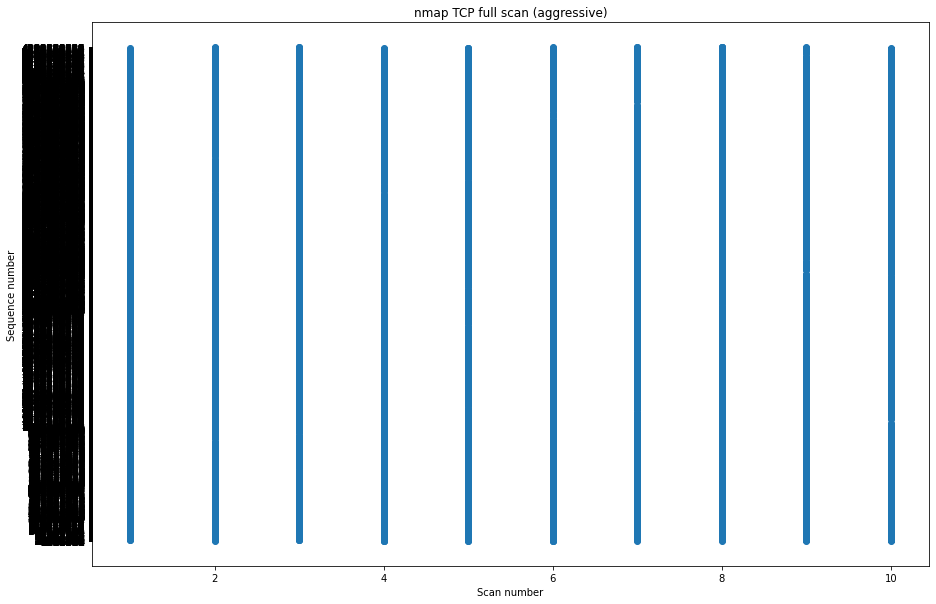

In [29]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


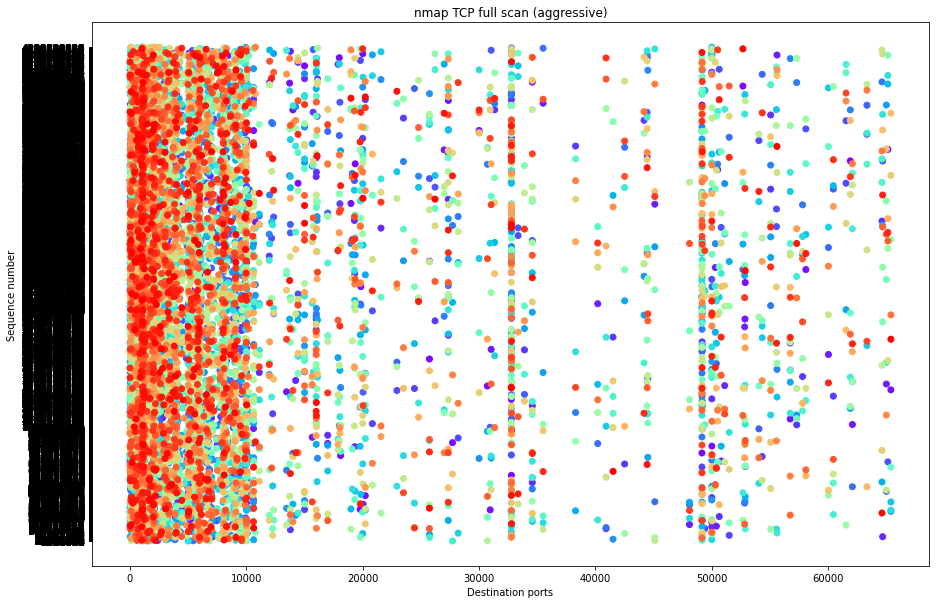

In [30]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

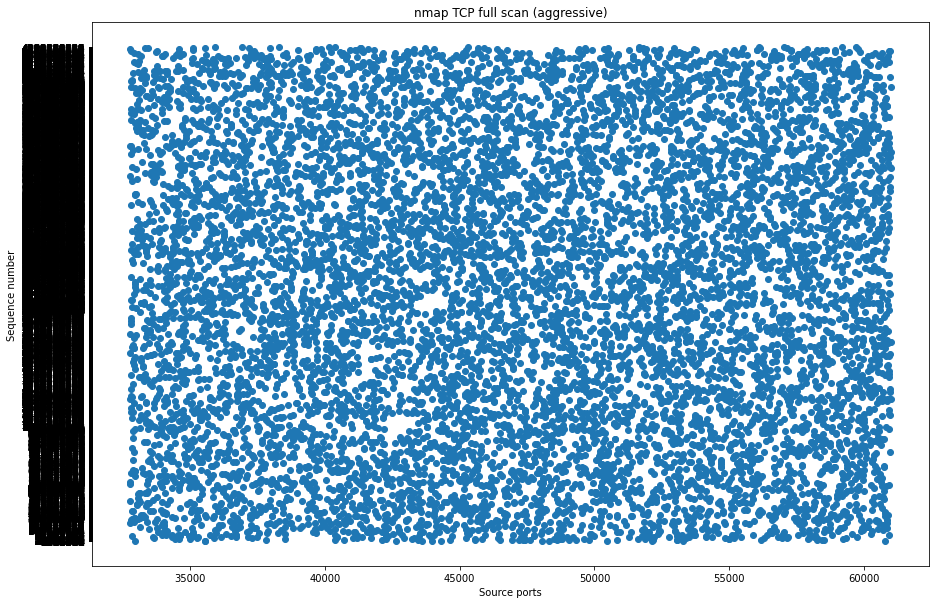

In [31]:
if src_ports:
    x = src_ports
    ys = sequences
    #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [32]:
len(set(orders_port['sport']))

7122

## Flags

In [33]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F